In [1]:
import os
import numpy as np
import pandas as pd

import sklearn
import xgboost as xgb

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv('../Данные/out.csv', index_col=0)

In [4]:
df.head()

,abiturient_id,spec_id,status,predmet_1,predmet_2,predmet_3,predmet_1_bal,predmet_2_bal,predmet_3_bal,edu_form,fin_type,sum_bal
1,202100004,30,1,Математика,Физика,Русский язык,68,61,82,1,1,190
2,202100004,31,0,Математика,Физика,Русский язык,68,61,82,1,1,190
3,202100004,12,0,Математика,Физика,Русский язык,68,61,82,1,1,190
4,202100004,11,0,Математика,Физика,Русский язык,68,61,82,1,1,190
5,202100004,22,0,Математика,Физика,Русский язык,68,61,82,1,1,190


In [5]:
y = df['status']
X = df.drop(['abiturient_id', 'status'], axis=1)

In [6]:
X.head()

,spec_id,predmet_1,predmet_2,predmet_3,predmet_1_bal,predmet_2_bal,predmet_3_bal,edu_form,fin_type,sum_bal
1,30,Математика,Физика,Русский язык,68,61,82,1,1,190
2,31,Математика,Физика,Русский язык,68,61,82,1,1,190
3,12,Математика,Физика,Русский язык,68,61,82,1,1,190
4,11,Математика,Физика,Русский язык,68,61,82,1,1,190
5,22,Математика,Физика,Русский язык,68,61,82,1,1,190


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train.head()

,spec_id,predmet_1,predmet_2,predmet_3,predmet_1_bal,predmet_2_bal,predmet_3_bal,edu_form,fin_type,sum_bal
20632,20,Математика,Физика,Русский язык,76,87,71,1,1,250
10029,6,Математика,Физика,Русский язык,72,64,92,1,1,200
13196,4,Математика,Информатика и ИКТ,Русский язык,74,78,80,1,1,230
19609,27,Математика,Физика,Русский язык,72,80,94,1,1,232
8624,2,Математика,Информатика и ИКТ,Русский язык,56,48,54,1,2,152


In [9]:
spec_id_enc = LabelEncoder()
predmet_1_enc = LabelEncoder()
predmet_2_enc = LabelEncoder()
predmet_3_enc = LabelEncoder()
edu_form_enc = LabelEncoder()
fin_type_enc = LabelEncoder()
encoders = [
    spec_id_enc,
    predmet_1_enc,
    predmet_2_enc,
    predmet_3_enc,
    edu_form_enc,
    fin_type_enc
]

In [10]:
categorical_vals = [
    'spec_id',
    'predmet_1',
    'predmet_2',
    'predmet_3',
    'edu_form',
    'fin_type'
]

In [11]:
for enc, val in zip(encoders, categorical_vals):
    enc.fit(X_train[val])
    X_train[val] = enc.transform(X_train[val])
    X_test[val] = enc.transform(X_test[val])

In [12]:
X_train.head()

,spec_id,predmet_1,predmet_2,predmet_3,predmet_1_bal,predmet_2_bal,predmet_3_bal,edu_form,fin_type,sum_bal
20632,18,1,4,1,76,87,71,0,0,250
10029,5,1,4,1,72,64,92,0,0,200
13196,3,1,1,1,74,78,80,0,0,230
19609,25,1,4,1,72,80,94,0,0,232
8624,1,1,1,1,56,48,54,0,1,152


In [13]:
gbm_clf = GradientBoostingClassifier(max_depth=5, max_features=5)

In [14]:
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features=5)

In [15]:
y_pred = gbm_clf.predict(X_test)

In [16]:
cnf_mt = confusion_matrix(y_test, y_pred) 

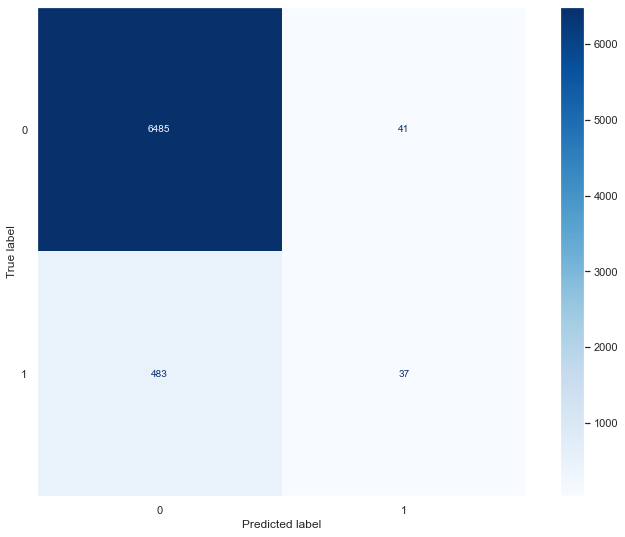

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
disp = ConfusionMatrixDisplay(cnf_mt)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.grid(False)

Обучающая выборка

In [18]:
accuracy_score(y_train, gbm_clf.predict(X_train))

0.9415588954910871

In [19]:
precision_score(y_train, gbm_clf.predict(X_train))

0.9415204678362573

In [20]:
recall_score(y_train, gbm_clf.predict(X_train))

0.16312056737588654

Тестовая выборка

In [21]:
accuracy_score(y_test, y_pred)

0.9256315640079478

In [22]:
precision_score(y_test, y_pred)

0.47435897435897434

In [23]:
recall_score(y_test, y_pred)

0.07115384615384615